# Implement a Decision Tree classifier using pre-pruning (max-depth)

In [1]:
import pandas as pd

df = pd.read_csv('heart.csv')

In [2]:
df.head(4)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1


In [5]:
X = df.drop('target', axis=1)
Y = df['target']

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.3, random_state=42
)

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

dt_simple = DecisionTreeClassifier(random_state=42)
dt_simple.fit(X_train, y_train)
y_pred_simple = dt_simple.predict(X_test)
print(accuracy_score(y_test, y_pred_simple))

0.7362637362637363


[]

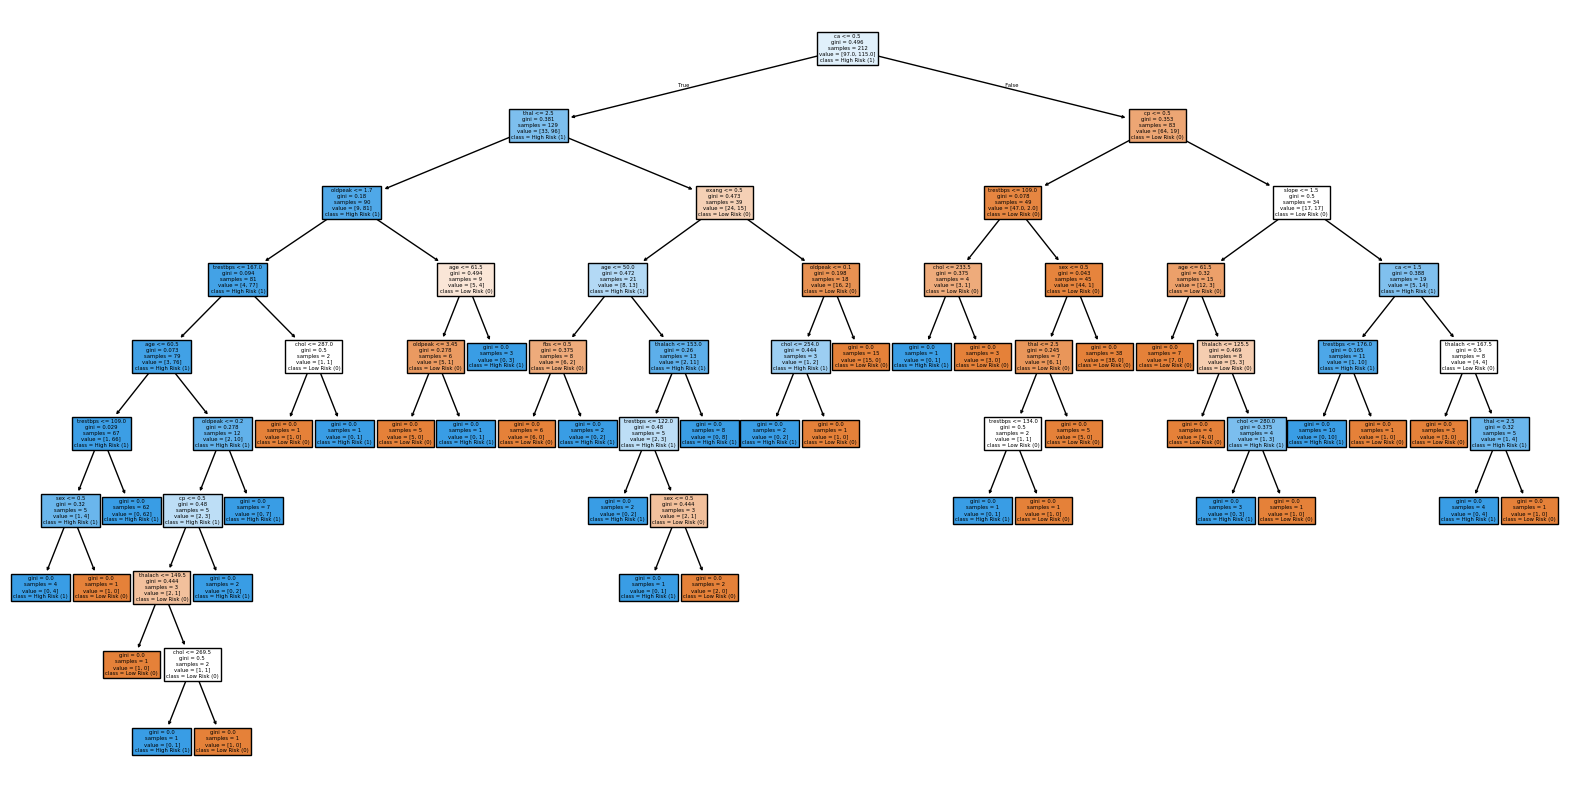

In [12]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(
    dt_simple,
    feature_names=X.columns.tolist(),
    class_names=['Low Risk (0)', 'High Risk (1)'],
    filled=True
)
plt.plot()

In [13]:
MAX_DEPTH_VALUE = 3

dt_pruned = DecisionTreeClassifier(
    max_depth=MAX_DEPTH_VALUE,
    random_state=42
)
dt_pruned.fit(X_train, y_train)
y_pred_pruned = dt_pruned.predict(X_test)
print(accuracy_score(y_test, y_pred_pruned))

0.7692307692307693


[]

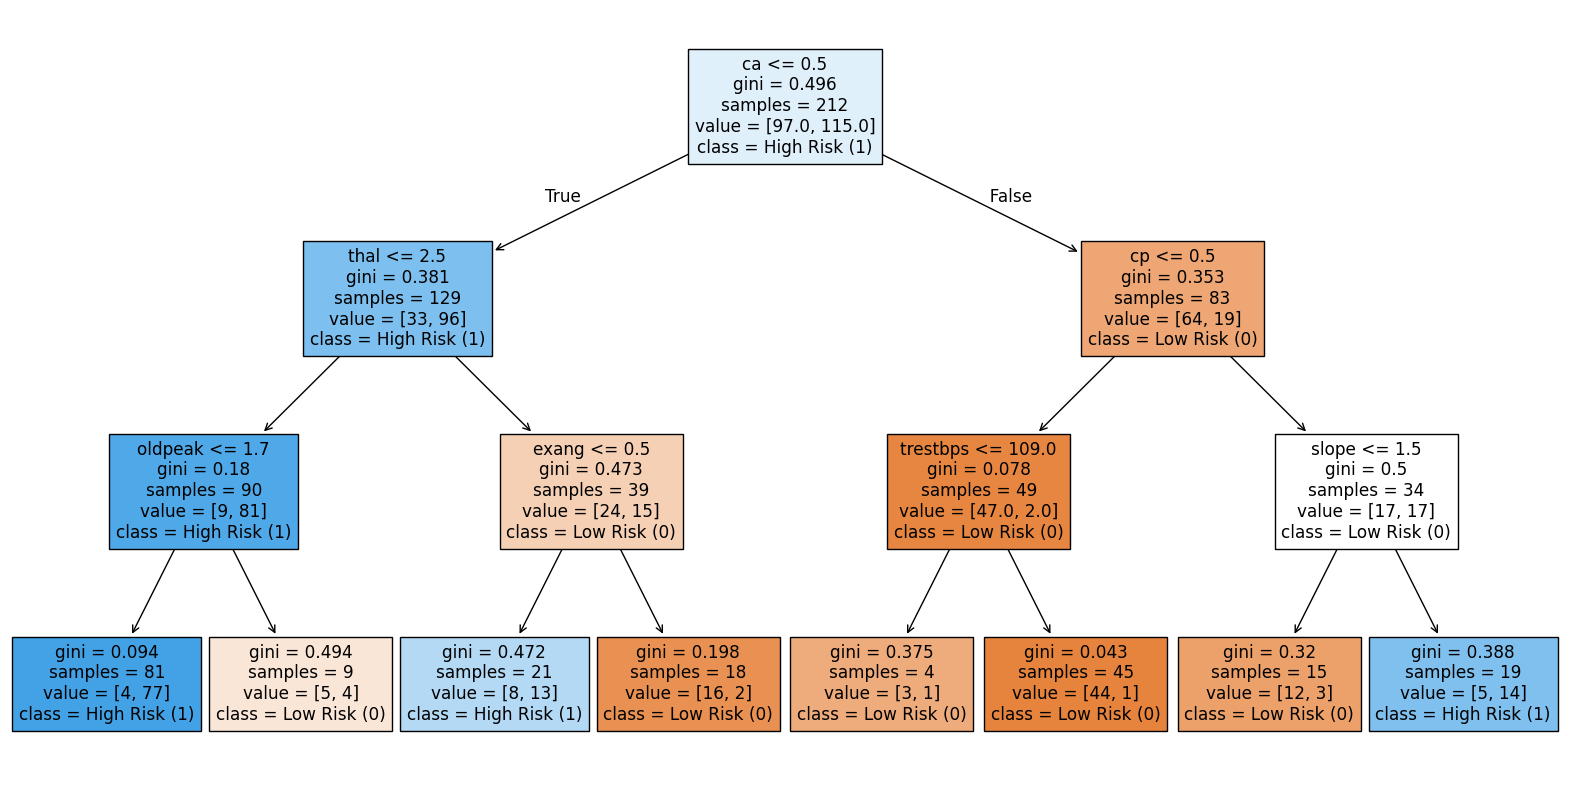

In [14]:
plt.figure(figsize=(20, 10))
plot_tree(
    dt_pruned,
    feature_names=X.columns.tolist(),
    class_names=['Low Risk (0)', 'High Risk (1)'],
    filled=True
)
plt.plot()